# 1. Descripción del proyecto 

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# 2.  Diccionario de los datos

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

# 3. Información general

In [1]:
# Importar librerias con las que se trabajara 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import numpy as np
import seaborn as sns

In [2]:
# Abrir el archivo
df_games = pd.read_csv('./datasets/games.csv')

In [3]:
# Informacion general del DF 
print(df_games.head())
df_games.info()
df_games.describe()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# 4. Preparar los datos 

In [4]:
# verificar valores duplicados
df_duplicados = df_games.duplicated().sum()
print(df_duplicados)

0


In [5]:
# verificar valores ausentes en las columnas 
df_ausentes = df_games.isna().sum()
print(df_ausentes)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
# reemplazar los nombres a minusculas 
df_games.columns = df_games.columns.str.lower()

In [7]:
# comprobar que las columnas del DF esten en minusculas
print(df_games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


# 4.1 Series 'year_of_release'

In [8]:
# En la columna year_of_release los valores ausentes dejarlos en 0 y convertirlos a int
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype('int')

In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


<span style="color:blue; font-weight:bold">
En la columna 'year' decidi modificar el tipo de datos de float a int, esto para facilitar el análisis que realizare posteriormente, como primer paso rellene los valores ausentes con 0, debido a que solo encontre 269 valores, lo cual no son de gran relevancia. Después cambie el tipo de dato de float a int 
</span>

# 4. 2 Series 'user_score'

In [10]:
# Verificar los valores unicos de la columna user_score
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# Filtrar de la columna score todos aquellos que sean 'tbd'
df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
# Convertir los valores 'tbd' a ausentes 
df_games.loc[df_games['user_score']== 'tbd', 'user_score'] = np.nan

In [13]:
# Cambiar el tipo de dato de la columna user_score a float 
df_games['user_score'] = df_games['user_score'].astype('float')

In [14]:
# comprobar los cambios 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<span style="color:blue; font-weight:bold">
En la columna 'user_critic' existian valores 'tbd' los cuales significan que no han sido calificados, reemplazar estos valores con 0 o algun otro dato como la media o mediana, afectaria al analisis sesgandolo ya que aun no han sido calificados por algun usuario, por lo cual decidi convertir esos valores 'tbd' a NaN. Por ultimo cambie el tipo de dato de object a float
</span>

# 4.3 Ventas totales 

In [15]:
# crear una nueva columna que contenga las ventas totales de las regiones
df_games['ventas_totales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [16]:
# verificar la columna
df_games['ventas_totales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: ventas_totales, Length: 16715, dtype: float64

# 5. Analizar los datos

In [17]:
# usar la funcion nlargest para observar los productos mas vendidos
df_games.nlargest(5, ['ventas_totales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# 5.1 Cuantos juegos fueron lanzados en diferentes años

In [18]:
# Juegos lanzados en diferentes años 
juegos_lanzados_por_año = df_games.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()
print(juegos_lanzados_por_año.head(10))

   year_of_release  name
0             2008  1427
1             2009  1426
2             2010  1255
3             2007  1197
4             2011  1136
5             2006  1006
6             2005   939
7             2002   829
8             2003   775
9             2004   762


In [19]:
# filtrar cuantos juegos con un año de lanzamiento en 0 existen
juegos_lanzados_por_año[juegos_lanzados_por_año['year_of_release'] == 0]

,year_of_release,name
20,0,269


In [20]:
# filtrar los datos que tengan un año de lanzamiento 0 para no mostrarlos
juegos_lanzados_por_año = juegos_lanzados_por_año[juegos_lanzados_por_año['year_of_release'] != 0]

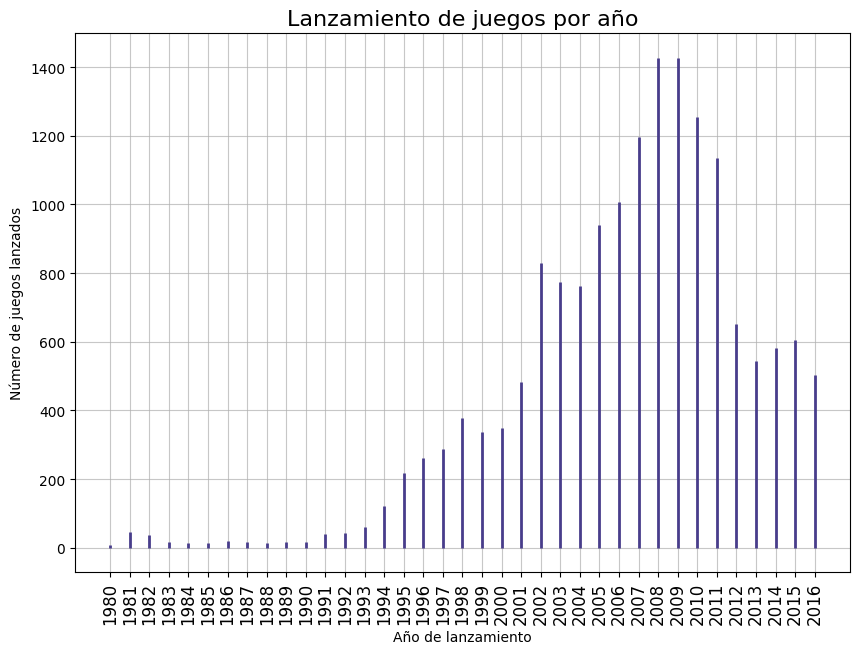

In [21]:
# Graficar los juegos lanzados por año
fig, ax = plt.subplots(figsize=(10, 7))

ax.vlines(x=juegos_lanzados_por_año['year_of_release'],
          ymin=0,
          ymax=juegos_lanzados_por_año['name'], 
          color='darkslateblue',
          linewidth=2)

ax.set_title('Lanzamiento de juegos por año', fontsize=16)
ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Número de juegos lanzados')
ax.set_xticks(juegos_lanzados_por_año['year_of_release'])
ax.set_xticklabels(juegos_lanzados_por_año['year_of_release'], rotation=90, fontsize=12)
ax.grid(True, linestyle='-', alpha=0.7)

plt.show()

<span style="color:blue; font-weight:bold">
Se observa que los años con mayores lanzamientos de videojuegos es en 2008 y 2009, seguido de 2010, 2007 y 2011, estos años se encuentran ubicados en el top 5 
</span>

# 5.2 Ventas totales de las plataformas

In [22]:
# mostrar las ventas de las plataformas por las ventas totales
df_platform = df_games.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()

In [23]:
# calcular el valor Z de las ventas totales de las plataformas
df_platform['z_score'] = (df_platform['ventas_totales'] - df_platform['ventas_totales'].mean()) / df_platform['ventas_totales'].std()

In [24]:
print(df_platform.head(5))

  platform  ventas_totales   z_score
0      PS2         1255.77  2.780807
1     X360          971.42  1.964085
2      PS3          939.65  1.872834
3      Wii          907.51  1.780520
4       DS          806.12  1.489304


In [25]:
# Crear columna para identificar las plataformas con mayores ventas totales y las que solian ser populares
df_platform['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in df_platform['z_score']]

In [26]:
# mostrar los resultados
df_platform

,platform,ventas_totales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


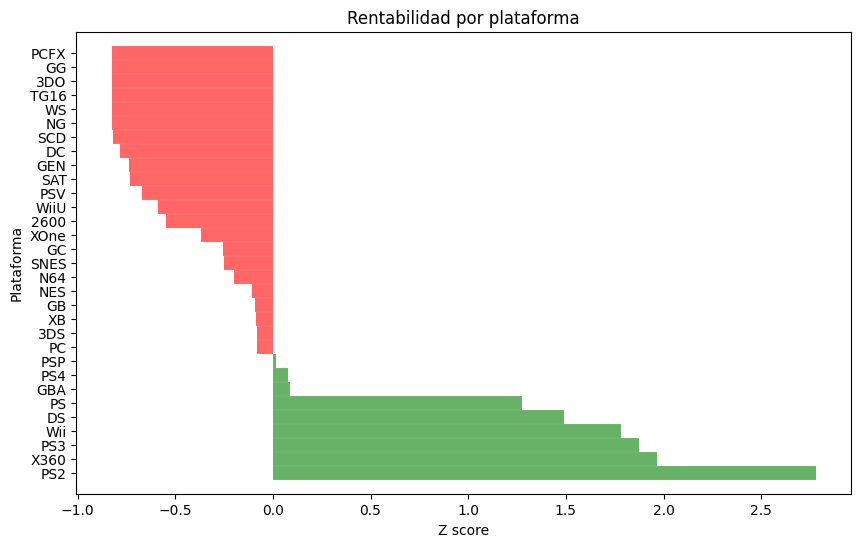

In [27]:
plt.figure(figsize=(10,6))
plt.hlines(
    y= df_platform['platform'], 
    xmin= 0,
    xmax= df_platform['z_score'], 
    color= df_platform['color'],
    linewidth= 10, 
    alpha=0.6)
plt.title('Rentabilidad por plataforma')
plt.xlabel('Z score')
plt.ylabel('Plataforma')
plt.show()

<span style="color:blue; font-weight:bold">
Para describir los datos de las ventas segun la plataforma se calculo el puntaje Z, para conocer su rentabilidad dentro del mercado, esto nos indica a cuantas desviaciones estandart esta respecto a la media, esto quiere decir que las consolas como el PS2 se encuentra a mas de 2.5 desviaciones de la media a la derecha (valor positivo) lo cual es un buen indicador en cuanto a sus ventas totales. 
</span>

# 5.3 plataformas lideres en ventas

In [28]:
# filtro para mostrar los datos mas relevantes para construir un modelo en el 2017
datos_recientes = df_games.query('year_of_release >=2012')

In [29]:
# construir pivot table para mostrar las plataformas lideres en ventas y como crecen y se reducen
pivot_platform = pd.pivot_table(datos_recientes, index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum').fillna(0)

In [30]:
# mostrar la tabla pivote
pivot_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


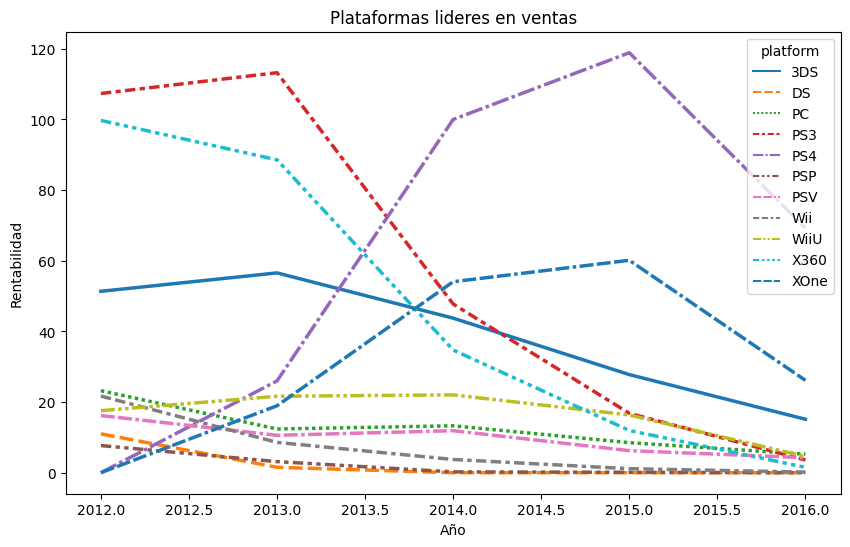

In [31]:
# crear grafico de lineas para observar cuales plataformas crecen y cuales disminuyen
plt.figure(figsize=(10,6))

sns.lineplot(data=pivot_platform, palette="tab10", linewidth=2.5)
plt.ylabel('Rentabilidad')
plt.xlabel('Año')
plt.title('Plataformas lideres en ventas')
plt.show()

<span style="color:blue; font-weight:bold">
Para analizar las plataformas lideres en ventas considere 5 años antes de la fecha de la campaña que se desea desarrollar (2017), ya que al ser datos de videojuegos estos cambian conforme al tiempo, y aunque las ventas de 2008 han sido las mas altas dentro de este conjunto de datos, ya no serian una muestra relevante a considerar para el objetivo de este analisis.
Desarrolle una pivot table y a partir de ella un grafico en donde se muestra que el PS4 es la plataforma que se ha mantenido como lider en ventas, seguido del XOne. Quien ha mostrado una gran perdida de ventas el es PS3 antecesor de la PS4, asi como el nintendo 3DS y la Wii
</span>

# 5.4 Ventas globales

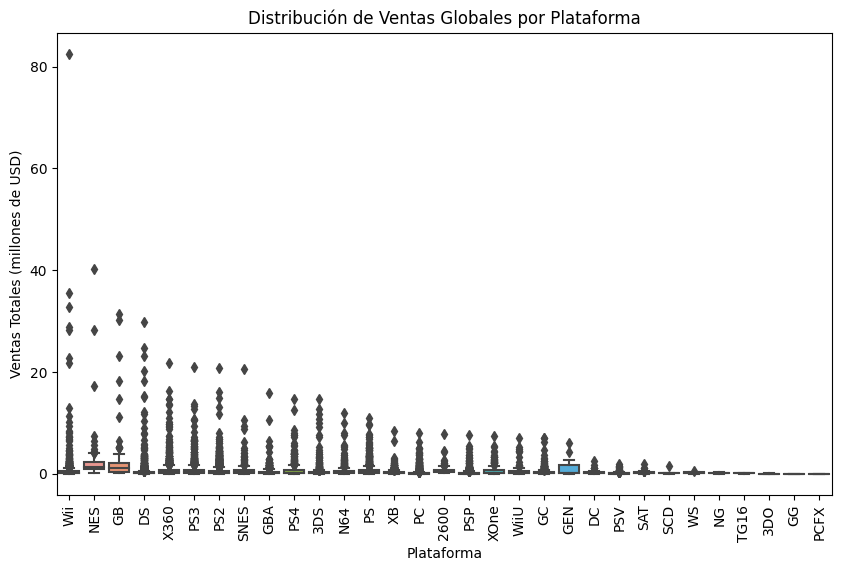

In [32]:
# crear diagrama que muestre las ventas globales

plt.figure(figsize=(10, 6))

sns.boxplot(x='platform', y='ventas_totales', data= df_games)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones de USD)')
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xticks(rotation =90)

plt.show()


In [33]:
# agrupar por platform y ventas totales, obtener promedio
ventas_globales = df_games.groupby('platform')['ventas_totales'].mean().sort_values(ascending=False).reset_index(name='Ventas globales promedio')
ventas_globales

,platform,Ventas globales promedio
0,GB,2.606735
1,NES,2.561735
2,GEN,1.061034
3,SNES,0.836987
4,PS4,0.801378
5,X360,0.769746
6,2600,0.729173
7,PS3,0.705973
8,Wii,0.687508
9,N64,0.685517


<span style="color:blue; font-weight:bold">
En cuanto a las ventas globales por plataforma en el diagrama de caja y bigote se observa que GB, NES y GEN son los que cuentan con menos outliers y esto se comprueba con la tabla abajo del grafico en donde se extrajeron los promedios de ventas.
</span>

# 5.5 Reseñas de usuarios a la PS4

In [34]:
# crear filtro para ps4 
filtro_ps4 = df_games[df_games['platform'] == 'PS4']

# calcular la correlacion entre critic_score y ventas totales de la ps4 
review_expert_ps4 = filtro_ps4['critic_score'].corr(filtro_ps4['ventas_totales'])

# calcular la correlacion entre user_score y ventas totales de la ps4 
review_user_ps4 = filtro_ps4['user_score'].corr(filtro_ps4['ventas_totales'])

# mostrar el resultado de las correlaciones de la ps4
print(f'La correlacion entre las reseñas de expertos y las ventas es: {review_expert_ps4}')
print(f'La correlacion entre las reseñas de usuarios y las ventas es: {review_user_ps4}')

La correlacion entre las reseñas de expertos y las ventas es: 0.40656790206178095
La correlacion entre las reseñas de usuarios y las ventas es: -0.031957110204556424


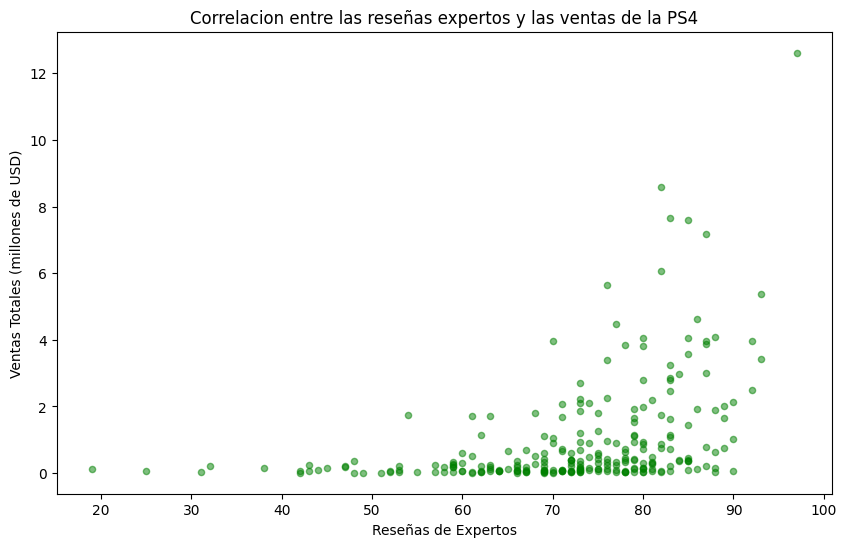

In [35]:
# crear grafico de dispersion de las Reseñas de Expertos
filtro_ps4.plot(x= 'critic_score',
                y='ventas_totales' , 
                title='Correlacion entre las reseñas expertos y las ventas de la PS4',
                xlabel= 'Reseñas de Expertos',
                ylabel= 'Ventas Totales (millones de USD)',
                kind= 'scatter', 
                color = 'green', 
                alpha=0.5,  
                figsize=(10,6))
plt.show()

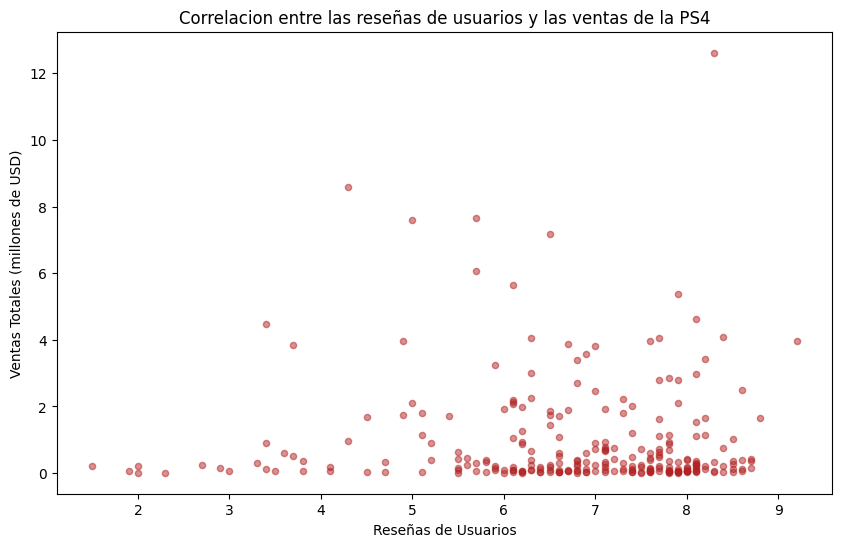

In [36]:
# crear grafico de dispersion de las Reseñas de Usuarios
filtro_ps4.plot(x= 'user_score',
                y='ventas_totales' , 
                title='Correlacion entre las reseñas de usuarios y las ventas de la PS4',
                xlabel= 'Reseñas de Usuarios',
                ylabel= 'Ventas Totales (millones de USD)',
                kind= 'scatter', 
                color = 'firebrick', 
                alpha=0.5,  
                figsize=(10,6))
plt.show()

<span style="color:blue; font-weight:bold">
Al calcular la correlación entre las reseñas de expertos y usuarios con respecto a las ventas totales se obtiene como resultado que existe una relación debil y positiva con respecto a las reseñas de expertos y las ventas totales, lo cual no es significativo, por otra parte los resultados de la correlación de las reseñas de usuarios con las ventas totales de la PS4 son negativas. Por lo tanto ninguna de las dos reseñas tienen una correlacion significativa con las ventas de la PS4, es decir, no influyen en las ventas de esta plataforma
</span>

# 5.6 Distribución general de los juegos por género 

In [37]:
# obtener el genero mas vendido por sus ventas totales 
ventas_genero = df_games.groupby('genre')['ventas_totales'].sum().reset_index()
ventas_genero = ventas_genero.sort_values(by='ventas_totales',ascending=False)
print(ventas_genero)

           genre  ventas_totales
0         Action         1744.17
10        Sports         1331.27
8        Shooter         1052.45
7   Role-Playing          934.56
4       Platform          827.77
3           Misc          802.51
6         Racing          728.67
2       Fighting          447.53
9     Simulation          389.97
5         Puzzle          242.57
1      Adventure          237.59
11      Strategy          174.23


In [38]:
# calcular el valor z para conocer la rentabilidad 
ventas_genero['valor_z'] = st.zscore(ventas_genero['ventas_totales'])
print(ventas_genero)

           genre  ventas_totales   valor_z
0         Action         1744.17  2.179571
10        Sports         1331.27  1.280880
8        Shooter         1052.45  0.674020
7   Role-Playing          934.56  0.417428
4       Platform          827.77  0.184996
3           Misc          802.51  0.130017
6         Racing          728.67 -0.030698
2       Fighting          447.53 -0.642609
9     Simulation          389.97 -0.767890
5         Puzzle          242.57 -1.088711
1      Adventure          237.59 -1.099550
11      Strategy          174.23 -1.237455


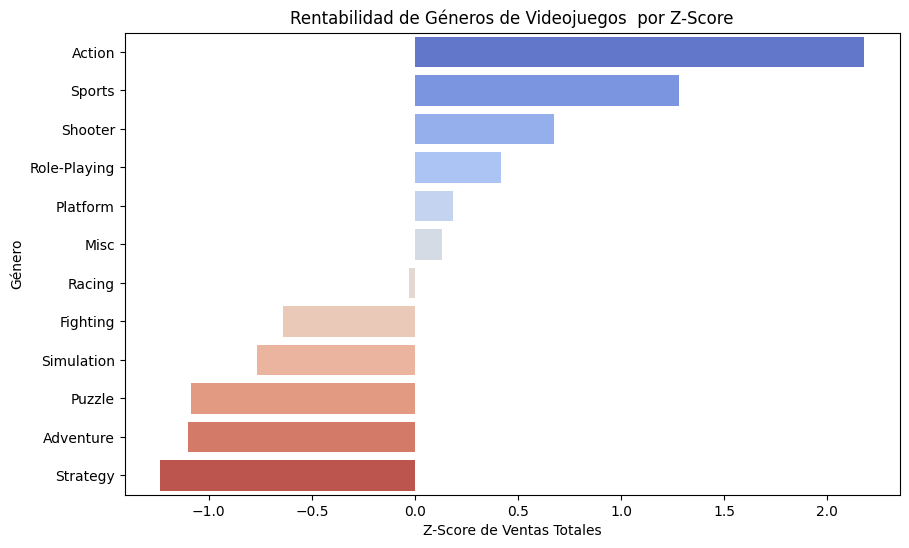

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(x='valor_z', y='genre', data=ventas_genero, palette='coolwarm')
plt.title('Rentabilidad de Géneros de Videojuegos  por Z-Score')
plt.xlabel('Z-Score de Ventas Totales')
plt.ylabel('Género')

plt.show()

<span style="color:blue; font-weight:bold">
Para conocer la rentabilidad de los generos primero se calculo el puntaje Z, el cual nos indica a cuantas desviaciones estandard se encuentran con relación a la media, posteriormente se desarrolo un grafico en el cual se observa que los juegos de género Action, Sport, Shooter, Role-playing, Platform y Misc son los mas rentables, ya que su puntaje Z arrojo un resultado positivo. 
En cuanto a los generos de los juegos con ventas mas altas se encuentran los de Action y Sport, mientras los generos con menores ventas son Strategy y Adventure. 
</span>

# 6. Perfil de usuario para cada región

# 6.1 Región Norte America

In [40]:
# filtro top 5 plataformas en NA 
platform_na = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

#crear variable top 5 de plataformas
top5_na_platform = platform_na.head(5).index

print(top5_na_platform)

Index(['X360', 'PS2', 'Wii', 'PS3', 'DS'], dtype='object', name='platform')


In [41]:
# filtrar el DF original con las plataformas principales
top_na = df_games[df_games['platform'].isin(top5_na_platform)]

# calcular cuotas del mercado de una region a otra
na_cuotas = top_na.groupby('platform').agg({'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales': 'sum'})

# calcular el total por columna
total_na = na_cuotas.sum(axis=0)

# obtener el porcentaje de cuotas en el mercado
na_cuotas = (na_cuotas / total_na) * 100

print(na_cuotas)

           na_sales   eu_sales   jp_sales
platform                                 
DS        15.550405  13.575145  36.828746
PS2       23.742019  24.384091  29.199530
PS3       16.001383  23.737279  16.821195
Wii       20.206580  18.844506  14.543128
X360      24.499614  19.458978   2.607401


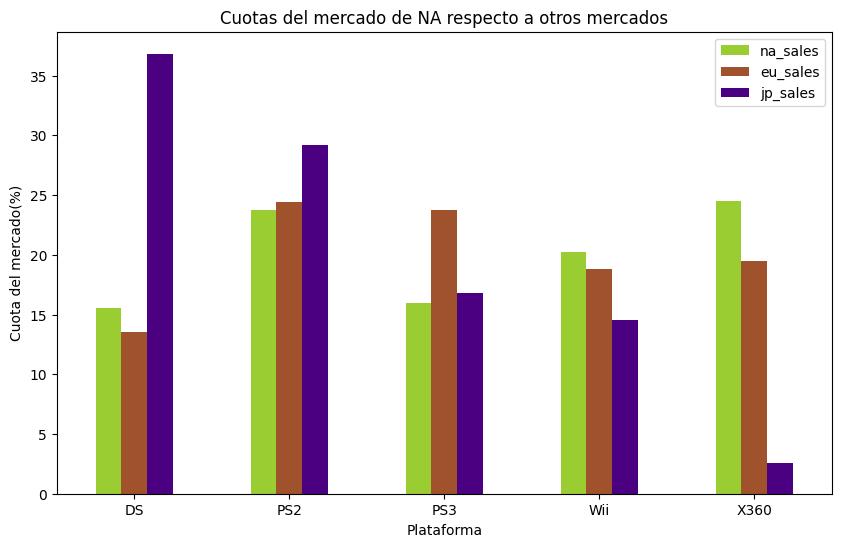

In [42]:
# crear grafico de barras 
na_cuotas.plot(title='Cuotas del mercado de NA respecto a otros mercados',
               xlabel='Plataforma', 
               ylabel='Cuota del mercado(%)',
               kind='bar',
               rot = 0,
               color=['yellowgreen', 'sienna', 'indigo'],
               figsize=(10,6))
plt.show()

<span style="color:blue; font-weight:bold">
En Norte America el top 5 de principales plataformas esta encabezada por el Xbox 360, seguido del PS2, Wii, PS3 y finalmente el DS. En el grafico de barras se muestra una comparacion del porcentaje de cuotas del mercado de las plataformas mas populares en NA, en donde se observa que claramente el Xbox 360 tiene un mayor porcentaje en esta region.
</span>

In [43]:
# filtro top 5 generos principales en NA
genre_na = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

print(genre_na.head(5))

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


<span style="color:blue; font-weight:bold">
En Norte America el top 5 de principales generos lo encabeza Action, seguido de Sports, Shooter, Platform y Misc, recordando el análisis de rentabilidad el top de Norte America coincide con los generos mas rentables
</span>

In [44]:
# crear variable dummy para incluir los datos categoricos a la correlacion
na_dummy = pd.get_dummies(df_games, columns=['rating'], drop_first=True)

# correlacionar si la clasificacion afecta a las ventas 
na_correlacion = na_dummy.corr()['na_sales'].filter(like='rating')

print(na_correlacion)

rating_E       0.041764
rating_E10+   -0.005453
rating_EC     -0.001940
rating_K-A     0.009716
rating_M       0.085072
rating_RP     -0.004337
rating_T      -0.003873
Name: na_sales, dtype: float64


<span style="color:blue; font-weight:bold">
En la última parte del análisis de la región de NA al contar con la variable categorica 'rating' se implemento el uso de variables dummy, esto con la finalidad de poder realizar el calculo de la correlación entre las distintas clasificaciones en esta region y si estas influyen en las ventas, sin embargo de las 7 clasificaciones de NA ninguna tiene una correlacion significativa, la mayoria son negativas y las unicas dos positivas estan muy lejos de tener una correlacion fuerte. Por lo tanto se podria concluir que las clasificaciones no influyen en las ventas de esta region. 
</span>

# 6.2 Región Europa

In [45]:
# filtro de plataformas principales en EU
platform_eu = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

# crear variable top 5 de plataformas
eu_top5_platform = platform_eu.head(5).index

print(eu_top5_platform)

Index(['PS2', 'PS3', 'X360', 'Wii', 'PS'], dtype='object', name='platform')


In [46]:
# filtrar el DF con el resultado del top 5
top_eu = df_games[df_games['platform'].isin(eu_top5_platform)]

# calcular cuotas del mercado 
eu_cuotas = top_eu.groupby('platform').agg({'eu_sales': 'sum', 'na_sales': 'sum', 'jp_sales': 'sum'})

# calcular el total por columnas
total_eu = eu_cuotas.sum(axis=0)

# obtener el porcentaje de cuotas en el mercado
eu_cuotas = (eu_cuotas / total_eu) * 100

print(eu_cuotas)
                         

           eu_sales   na_sales   jp_sales
platform                                 
PS        15.083748  13.944854  31.707372
PS2       23.958451  24.193401  31.566773
PS3       23.322930  16.305600  18.184911
Wii       18.515563  20.590746  15.722158
X360      19.119309  24.965399   2.818786


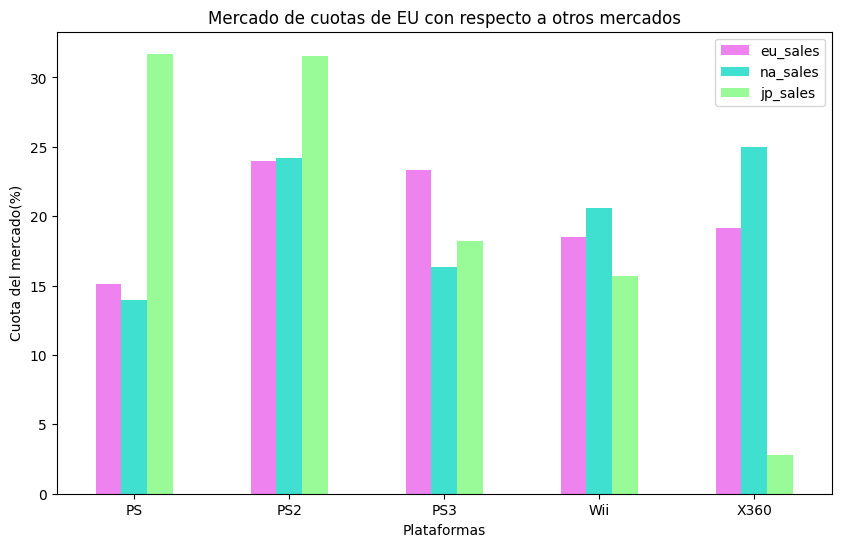

In [47]:
# crear grafico de barras 
eu_cuotas.plot(title='Mercado de cuotas de EU con respecto a otros mercados', 
               xlabel= 'Plataformas',
               ylabel='Cuota del mercado(%)',
               kind='bar',
               rot=0, 
               color=['violet', 'turquoise', 'palegreen'],
               figsize=(10,6))
plt.show()

<span style="color:blue; font-weight:bold">
En Europa el top 5 de principales plataformas esta encabezada por PS2, seguido del PS3, Xbox 360, Wii y por ultimo el PS. Sin embargo al compararlo con otros mercados el PS2 y el PS tienen mayor porcentaje de cuotas en el mercado Japonés. El único que lidera este porcentaje para esta region es el PS3.
</span>

In [48]:
# Top 5 generos principales en EU
genre_eu = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(genre_eu.head(5))

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


<span style="color:blue; font-weight:bold">
Siguiendo con el análisis el top 5 de generos principales para Europa esta encabezado por Action, seguido de Sports, Shooter, Racing y Misc. La mayoria de los géneros de videojuegos siguen el analisis de rentabilidad previamente realizado, sin embargo el género racing ocupa la cuarta posición de este top, por lo cual debera ser considerado para la campaña de 2017 ya que es un genero no rentable y esto podría causar efectos negativos, es decir, perdidas.
</span>

In [49]:
# crear variable dummy para incluir los datos categoricos a la correlacion
eu_dummy = pd.get_dummies(df_games, columns=['rating'], drop_first=True)

# correlacionar la clasificacion con las ventas 
eu_correlacion = eu_dummy.corr()['eu_sales'].filter(like='rating')

print(eu_correlacion)

rating_E       0.036656
rating_E10+   -0.007445
rating_EC     -0.005709
rating_K-A    -0.001466
rating_M       0.105022
rating_RP     -0.003152
rating_T      -0.000776
Name: eu_sales, dtype: float64


<span style="color:blue; font-weight:bold">
En esta ultima parte en el analisis de la region de Europa, se implementaron variables dummy, para poder correlacionar la variable categorica 'rating' y si estas influyen en las ventas de EU, sin embargo al analizarlas la mayoria son negativas y muy lejanas a -1 por lo tanto es una correlacion negativa y debil, por otra parte las clasificaciones positivas de igual manera son debiles, por lo cual ninguna de ellas influye directamente a las ventas de esta region.
</span>

# 6.3 Región Japón

In [50]:
# filtro top 5 plataformas principales en JP
platform_jp = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# crear variable que almacene el top 5 de plataformas 
top5_platform_jp = platform_jp.head(5).index

print(top5_platform_jp)

Index(['DS', 'PS', 'PS2', 'SNES', '3DS'], dtype='object', name='platform')


In [51]:
# filtrar DF original con el top 5 
top_jp = df_games[df_games['platform'].isin(top5_platform_jp)]

# calcular las cuotas del mercado 
cuotas_jp = top_jp.groupby('platform').agg({'jp_sales': 'sum', 'na_sales': 'sum', 'eu_sales': 'sum'})

# calcular el porcentaje de cuotas segun el mercado por columna
total_jp = cuotas_jp.sum(axis=0)
cuotas_jp = (cuotas_jp / total_jp) * 100

print(cuotas_jp)

           jp_sales   na_sales   eu_sales
platform                                 
3DS       14.984892   5.767955   7.476499
DS        26.133877  26.418327  22.970656
PS        20.812432  23.248680  25.976821
PS2       20.720144  40.334927  41.260595
SNES      17.348655   4.230110   2.315428


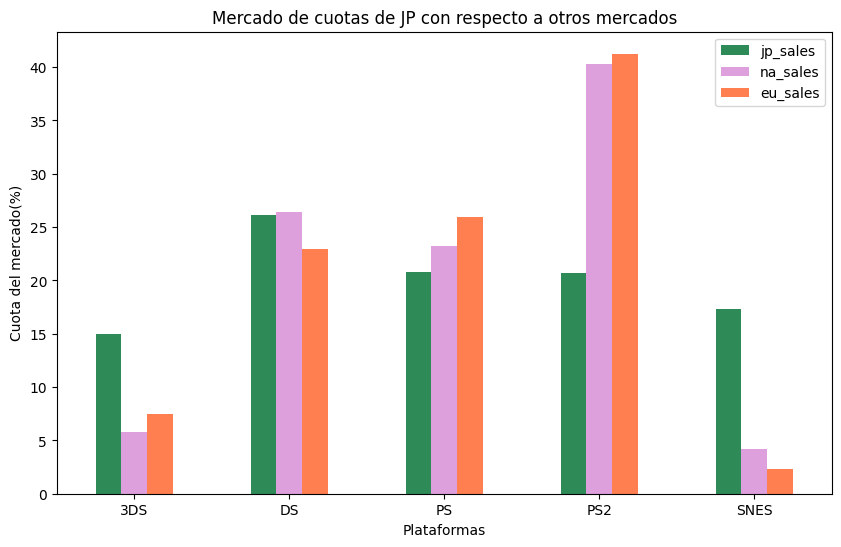

In [52]:
# crear grafica de barras con cuotas del mercado de JP
cuotas_jp.plot(title='Mercado de cuotas de JP con respecto a otros mercados', 
               xlabel= 'Plataformas',
               ylabel='Cuota del mercado(%)',
               kind='bar',
               rot=0, 
               color=['seagreen', 'plum', 'coral'],
               figsize=(10,6))
plt.show()

<span style="color:blue; font-weight:bold">
El top 5 de plataformas principales en Japón estan lideradas por la DS, seguidos de la PS2, PS, SNES y la nintendo 3DS. Sin embargo. la unica de estas consolas que tiene un claro porcentaje de cuotas con respecto a los otros mercados es la SNES.
</span>

In [53]:
# filtro top 5 generos principales
genre_jp = df_games.groupby('genre')['jp_sales'].sum().sort_index()
print(genre_jp.head(5))

genre
Action       161.43
Adventure     52.30
Fighting      87.48
Misc         108.11
Platform     130.83
Name: jp_sales, dtype: float64


<span style="color:blue; font-weight:bold">
En cuanto al top 5 de generos principales se observa que Action lidera la lista, seguido de Adventure, Fighting, Misc y Platform, solo 3 de estos generos se encuentran dentro de la rentabilidad de videojuegos. Los generos como Fighting y Adventure se encuentran dentro de los menos rentables por lo cual es necesario no considerarlos dentro de la campaña de 2017.
</span>

In [54]:
# crear variable dummy para incluir los datos categoricos a la correlacion
jp_dummy = pd.get_dummies(df_games, columns=['rating'], drop_first=True)

# correlacionar la clasificacion con las ventas de JP
jp_correlacion = jp_dummy.corr()['jp_sales'].filter(like='rating')

print(jp_correlacion)

rating_E      -0.050704
rating_E10+   -0.048645
rating_EC     -0.005499
rating_K-A     0.017745
rating_M      -0.037975
rating_RP     -0.003367
rating_T      -0.039790
Name: jp_sales, dtype: float64


<span style="color:blue; font-weight:bold">
En esta ultima parte en el analisis de la region de Japón, se implementaron variables dummy, para poder correlacionar la variable categorica 'rating' y si estas influyen en las ventas de JP, sin embargo al analizarlas todas excepto 1 son negativas y debiles. Asimismo la unica clasificacion que es positiva se encuentra muy lejos de 1 por lo cual ninguna de ellas influye directamente en la ventas de esta region.
</span>

# 6. Prueba de hipótesis 

# Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

# Hipótesis Nula - no existen diferencias entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

# Hipótesis Alternativa - existen diferencias entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

In [55]:
# filtro para Xbox One
filtro_xbox = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
mean_xbox = filtro_xbox.mean()
# filtro para PC
filtro_pc = df_games[df_games['platform'] =='PC']['user_score'].dropna()
mean_pc = filtro_pc.mean()

print(f'El promedio de las calificaciones de user_score para xbox es: {mean_xbox}')
print(f'\nEl promedio de las calificaciones de user_score para pc es: {mean_pc}')


El promedio de las calificaciones de user_score para xbox es: 6.521428571428572

El promedio de las calificaciones de user_score para pc es: 7.062467532467533


In [56]:
# establecer valor alpha 
alpha = 0.05

# realizar prueba ttest para independientes 
diferencia_promedios = st.ttest_ind(filtro_xbox, filtro_pc)

# extraer el valor p
print('El valor p es: ', diferencia_promedios.pvalue)

# comparar el valor p con el nivel de significancia 
if diferencia_promedios.pvalue < alpha: 
    print('Rechazar hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

El valor p es:  1.3896435533548819e-05
Rechazar hipótesis nula


<span style="color:blue; font-weight:bold">
Para comprobar la primera hipótesis se creo un filtro para extraer los datos de las calificaciones de usuarios para el Xbox One y para la PC, una vez que se extrajeron se considero un nivel de significancia(alpha) en 0.05, se eligio la prueba T de student para muestras independientes, de esta manera se obtuvo un valor p mayor al alpha por lo cual se rechaza la hipotesis nula y se puede decir que si existen diferencias significativas en los promedios de calificaciones de usuarios para las plataformas de Xbox One y PC.
</span>

# Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Hipótesis nula: No existen diferencias entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

# Hipótesis alternativa:  Existen diferencias entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

In [57]:
# filtro para action
filtro_action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
mean_action = filtro_action.mean()

# filtro para sports 
filtro_sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()
mean_sports = filtro_sports.mean()

print(f'El promedio de las calificaciones de user_score para Action es: {mean_action}')
print(f'\nEl promedio de las calificaciones de user_score para Sporst es: {mean_sports}')

El promedio de las calificaciones de user_score para Action es: 7.054043715846995

El promedio de las calificaciones de user_score para Sporst es: 6.961196736174069


In [58]:
# realizar prueba ttest 
promedio_genre = st.ttest_ind(filtro_action, filtro_sports)

# extraer el valor p
print(f'El valor p es:', promedio_genre.pvalue)

# comparar el valor p con el nivel de significancia 
if promedio_genre.pvalue < alpha: 
    print('Rechazar hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

El valor p es: 0.10406951359049141
No podemos rechazar la hipótesis nula


<span style="color:blue; font-weight:bold">
Para la ultima hipótesis de igual manera que en la anterior se establecio un nivel de significancia (alpha) de 0.05 se eligio una prueba t de student para muestras independientes. Esto dio como resultado un valor p menor al alpha por lo cual la hipotesis nula no puede ser rechazada, lo que indica que no hay una diferencia significativa entre los promedios de las calificaciones de usuarios que juegan videojuegos del género Action y Sports. 
</span>

# 7.  Conclusión General

<span style="color:blue; font-weight:bold">
Esta base de datos contaba con muchas de sus columnas con datos ausentes, principalmente en las columnas de rating, criticas de expertos y usuarios, sin embargo no fue posible rellenar estos valores con la media o mediana, debido a que esto produciria un sesgo en los datos, ya que son opiniones de jugadores reales, por lo cual se decidio mantener los NaN. En cuanto a valores duplicados no se encontraron dentro del DataSet. Para algunas columnas como year_of_release y user_score fue necesario cambiar el tipo de datos para un mejor manejo en el analisis. 
    
    
En el analisis se obtuvieron resultados interesantes, por ejemplo las mejores ventas de videojuegos se obtuvieron en los años 2008 y 2009, aqui existieron muchos lanzamientos. Por otra parte al realizar un analisis de rentabilidad segun el valor Z de cada plataforma, se obtuvo como resultado que la consola PS2, Xbox 360, PS3, entre otras son las mas rentables esto considerando todos los años del DF. Sin embargo para realizar la campaña de 2017 fue necesario tomar los datos de 5 años antes, es decir, de 2012, esto se debe al tipo de mercado y su fluctuacion. 
Una vez realizado este filtro, se obtuvo que la PS4 y el Xbox One eran las mas rentables, ya que mantuvieron sus ventas y no se desplomaron como la nintendo 3DS o el PS3. 
    
Por otra parte se realizo un analisis de rentabilidad sobre el genero de los videojuegos, esto dio como resultado dos partes, los generos mas rentables de videojuegos como Action, Sports, Shooter, y los menos rentables como Strategy, Adventure, Puzzle, entre otros. 
    
De esta manera se analizo el mercado de cada uno de las regiones incluidas en este DataSet lo que dio resultados a considerarse. En la region de NA, se identifico que las consolas lideres son Xbox 360 y el Wii, los jugadores tienen una inclinacion hacia los videojuegos de Accion, Sports, Shooters entre otros. Para la region de EU la consola lider fue la PS3, la inclinacion de los jugadores al genero de los videojuegos fue muy similar a la de NA, sin embargo, tambien la categoria Racing se encuentra dentro del top 5 de preferencias, pero dicha categoria se encuentra en los videojuegos menos rentables, por lo cual es necesario tomarlo en consideracion.

Por ultimo, para la region de JP las consolas lideres en ventas son el 3DS, DS y la SNES, en cuanto a los generos, se detectaron dos categorias (Adventure y Fighting) dentro del top 5 de preferencias, estos tambien se encuentran en los menos rentables. Además se realizo una correlación en todas las regiones, para saber si las clasificaciones de los videojuegos afectaban a las cuotas de ventas, pero esto arrojo en la gran mayoria una correlacion negativa y debil.

Finalmente en la comprobacion de las hipotesis: en la primera se encontro que si existen diferencias significativas en las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC. En cuanto a la segunda hipotesis, no se obtuvo una diferencia significativa en los promedios del genero de Action y Sports, esto se observo en las graficas, ya que los dos son lideres en los videojuegos mas rentables.
</span>